<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2021/week_5/TidyTuesday_Plastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Page 13: https://www.breakfreefromplastic.org/wp-content/uploads/2020/07/branded-2019.pdf


# Import packages and data

Packages

In [27]:
import pandas as pd
import numpy as np
import random
import math

import matplotlib.pyplot as plt

Data

In [28]:
df_plastics = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-26/plastics.csv')

df_plastics.head()

,country,year,parent_company,empty,hdpe,ldpe,o,pet,pp,ps,pvc,grand_total,num_events,volunteers
0,Argentina,2019,Grand Total,0.0,215.0,55.0,607.0,1376.0,281.0,116.0,18.0,2668.0,4,243.0
1,Argentina,2019,Unbranded,0.0,155.0,50.0,532.0,848.0,122.0,114.0,17.0,1838.0,4,243.0
2,Argentina,2019,The Coca-Cola Company,0.0,0.0,0.0,0.0,222.0,35.0,0.0,0.0,257.0,4,243.0
3,Argentina,2019,Secco,0.0,0.0,0.0,0.0,39.0,4.0,0.0,0.0,43.0,4,243.0
4,Argentina,2019,Doble Cola,0.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,38.0,4,243.0


# Wrangle

In [35]:
# Focus on 2020 only 
df_plastics_2020 = df_plastics[(df_plastics['year'] == 2020)]

# Find the total pieces of plastic for each country in 2020
df_plastics_2020_sum = df_plastics_2020.groupby('country').sum()[['grand_total']].reset_index()

# Find the total volunteers in each country. Can't do sum bc of how data is structured.
df_plastics_2020_vols = df_plastics_2020.groupby('country').head(1)[['country', 'volunteers']]

# Only interested in these countries
plot_countries = ['Portugal', 'Indonesia',
                  'Philippines', 'Nigeria',
                  'China']

# Filter the plastics and volunteers total to countries of interest
df_plastics_2020_sum_select = df_plastics_2020_sum[df_plastics_2020_sum['country'].isin(plot_countries)]
df_plastics_2020_vols_select = df_plastics_2020_vols[df_plastics_2020_vols['country'].isin(plot_countries)]

# Join plastic and volunteer total
df_plot = df_plastics_2020_sum_select.merge(df_plastics_2020_vols_select, on = 'country', how = 'inner')

# Make all values integers
df_plot['grand_total'] = df_plot['grand_total'].astype(int)
df_plot['volunteers'] = df_plot['volunteers'].astype(int)

# Make text labels for plot
df_plot['volunteer_text'] = df_plot['volunteers'].astype(str) + ' volunteers'
df_plot['trash_text'] = df_plot['grand_total'].astype(str) + ' pieces of plastic'

# Inspect
df_plot.head()

,country,grand_total,volunteers,volunteer_text,trash_text
0,China,2332,2175,2175 volunteers,2332 pieces of plastic
1,Indonesia,10156,392,392 volunteers,10156 pieces of plastic
2,Nigeria,63253,2099,2099 volunteers,63253 pieces of plastic
3,Philippines,55184,915,915 volunteers,55184 pieces of plastic
4,Portugal,8406,65,65 volunteers,8406 pieces of plastic


Create function that converts pieces of trash to a number of scatter points that form a circle.

In [36]:
# Need a function that given a radius, and # pieces of trash, will return a df with coords

def make_circle_coords(circle_radius, trash_pieces, country):

  scaled_trash_pieces = trash_pieces / 100

  x_coords = []
  y_coords = []

  for i in np.arange(0, round(scaled_trash_pieces)):

    # Circle radius proportional to scaled_trash_pieces
    circle_radius = math.sqrt(scaled_trash_pieces/math.pi)

    # Distance of single point from center of larger circle
    r = circle_radius * math.sqrt(random.uniform(0, 1))

    # Theta of point
    theta = random.uniform(0, 1) * 2 * math.pi

    # Covnert to cartesian
    x = 0 + r * math.cos(theta)
    y = 0 + r * math.sin(theta)

    # Append to list
    x_coords.append(x)
    y_coords.append(y)

  # Make into df
  df_output = pd.DataFrame({'x_coords': x_coords,
                            'y_coords':y_coords})
  
  df_output['country'] = country
  
  return(df_output)

Use the above function to generate points for each of the countries

In [37]:

# Need the country names and pieces of trash to iterate with
plot_countries = df_plot['country'].to_list()
plot_trash_pieces = df_plot['grand_total'].to_list()

# Collect dfs output by function in a list
all_circle_points = []

# Iterate through countries and pieces of trash
for country_name, num_trash_pieces in zip(plot_countries, plot_trash_pieces):
  
  df_circle_points = make_circle_coords(circle_radius = 5, trash_pieces = num_trash_pieces, country = country_name)

  all_circle_points.append(df_circle_points)

# Concat list of dfs into one df
df_all_circle_points = pd.concat(all_circle_points)

# Plot

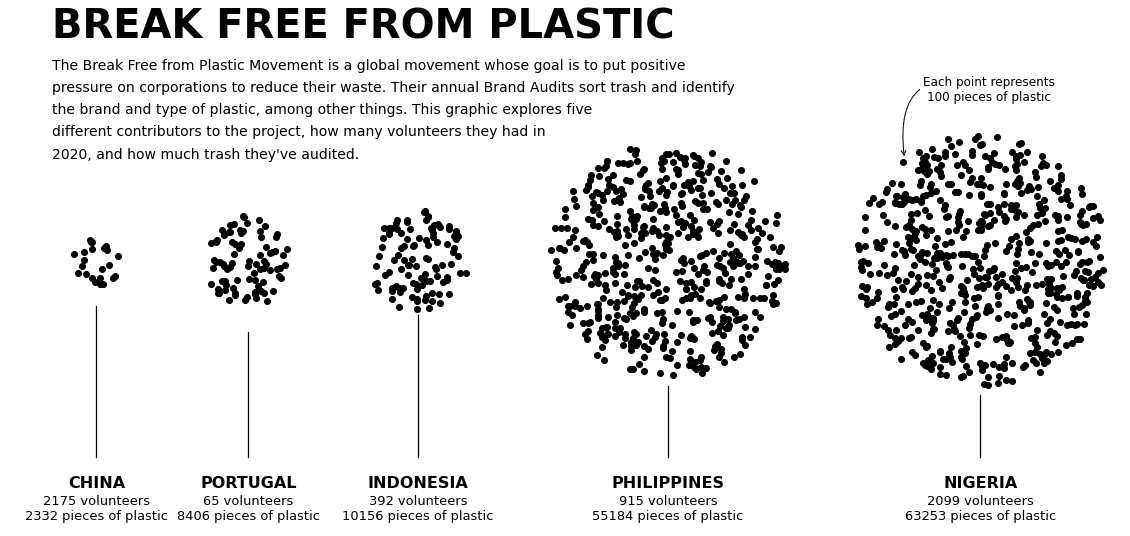

In [90]:
fig, ax = plt.subplots(figsize = (20, 10))

###############
## MAIN PLOT ##
###############

# Manually adjust x coords so the circles don't overlap.
# There is certainly an automated way to do this, but I decided to do it manually for full control
# Use this dict to store x-axis spacing

country_x_spacing = {'China':0,
                     'Portugal':17,
                     'Indonesia':36,
                     'Philippines':64,
                     'Nigeria':99}

for country_name in country_x_spacing.keys():
  ax.scatter(df_all_circle_points[df_all_circle_points['country'] == country_name]['x_coords'] + country_x_spacing[country_name],
           df_all_circle_points[df_all_circle_points['country'] == country_name]['y_coords'],
           color  = 'black')

####################
## VERTICAL LINES ##
####################

# Use country_x_spacing for the x coordinates
# Mn=anually define y coords based on how big the circle is

ax.plot([country_x_spacing['China'], country_x_spacing['China']], [-22, -5], color = 'black', lw = 1.25)
ax.plot([country_x_spacing['Indonesia'], country_x_spacing['Indonesia']], [-22, -6], color = 'black', lw = 1.25)
ax.plot([country_x_spacing['Portugal'], country_x_spacing['Portugal']], [-22, -8], color = 'black', lw = 1.25)
ax.plot([country_x_spacing['Philippines'], country_x_spacing['Philippines']], [-22, -14], color = 'black', lw = 1.25)
ax.plot([country_x_spacing['Nigeria'], country_x_spacing['Nigeria']], [-22, -15], color = 'black', lw = 1.25)

############
## LABELS ##
############

country_label_height = -24

# Country name
for country_name in country_x_spacing.keys():

    ax.text(country_x_spacing[country_name], country_label_height,
          country_name.upper(),
          fontsize = 16,
          weight = 'bold',
          ha = 'center',
          va = 'top')



# Country subtext
for country_name in country_x_spacing.keys():
  ax.text(country_x_spacing[country_name], country_label_height - 5,
        df_plot[df_plot['country'] == country_name]['volunteer_text'].values[0] + '\n' + df_plot[df_plot['country'] == country_name]['trash_text'].values[0],
        fontsize = 13,
        ha = 'center')


###########
## TITLE ##
###########

ax.text(-5, 25, 
        'BREAK FREE FROM PLASTIC',
        fontsize = 40,
        weight = 'bold')

desc_text = """The Break Free from Plastic Movement is a global movement whose goal is to put positive
pressure on corporations to reduce their waste. Their annual Brand Audits sort trash and identify
the brand and type of plastic, among other things. This graphic explores five
different contributors to the project, how many volunteers they had in
2020, and how much trash they've audited."""

ax.text(-5, 11.5, 
        desc_text,
        fontsize = 14,
        linespacing = 1.75)

ax.set_xlim(-10, 115)
ax.set_ylim(-30, 25)

################
## ANNOTATION ##
################

# Points in circle generated randomly so will need to tweak xy arg if reproducing
ax.annotate('Each point represents\n100 pieces of plastic',
             xy = (90.5, 11.5), xycoords = 'data',
             xytext = (100, 18), textcoords = 'data', ha = 'center', fontsize = 12,
             arrowprops = dict(arrowstyle = "->",
                               connectionstyle = 'arc3,rad = 0.8'))


######################
## EXTRA FORMATTING ##
######################

# Equal aspect necessary for circles to form
ax.set_aspect('equal')
ax.axis('off')

# Save
plt.savefig('Break Free From Plastic', bbox_inches = 'tight')